<a href="https://colab.research.google.com/github/ChandniMehta9/data-prediction-models/blob/main/Test_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
data=pd.read_csv('test_scores.csv')
print(data)
print(data.columns)

     school school_setting school_type classroom teaching_method  n_student  \
0     ANKYI          Urban  Non-public       6OL        Standard       20.0   
1     ANKYI          Urban  Non-public       6OL        Standard       20.0   
2     ANKYI          Urban  Non-public       6OL        Standard       20.0   
3     ANKYI          Urban  Non-public       6OL        Standard       20.0   
4     ANKYI          Urban  Non-public       6OL        Standard       20.0   
...     ...            ...         ...       ...             ...        ...   
2128  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2129  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2130  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2131  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2132  ZOWMK          Urban      Public       ZBH        Standard       30.0   

     student_id  gender                            

Text(0.5, 0, 'Scores')

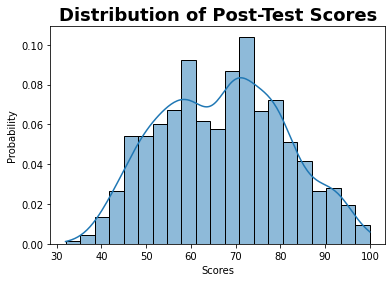

In [17]:
#visualizing the data 
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.histplot(data=data,
                   x="posttest",
                   kde=True,
                   stat="probability",
                  );

plt.title("Distribution of Post-Test Scores", fontweight="bold", fontsize=18)
plt.xlabel("Scores")

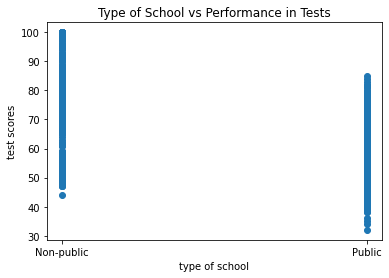

In [18]:
#visualizing the data 
score=data['posttest'][1:1000]
type=data['school_type'][1:1000]
plt.scatter(type,score)
plt.title('Type of School vs Performance in Tests')
plt.xlabel('type of school')
plt.ylabel('test scores')
plt.show()

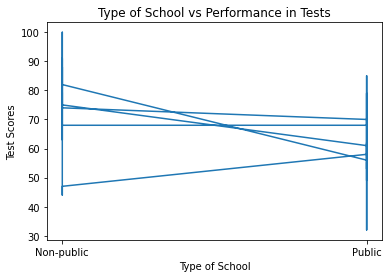

In [19]:
#visualizing the data 
import matplotlib.pyplot as plt
score=data['posttest'][1:1000]
type=data['school_type'][1:1000]
plt.plot(type,score)
plt.title('Type of School vs Performance in Tests')
plt.xlabel('Type of School')
plt.ylabel('Test Scores')
plt.show()

In [26]:
#cleaning data
data.drop(['school', 'school_setting','classroom',
       'teaching_method', 'n_student', 'student_id', 'gender', 'lunch',
       'pretest'],axis=1,inplace=True)
data.dropna(inplace=True)
data.isnull().sum()
data.head()

,school_type,posttest
0,Non-public,72.0
1,Non-public,79.0
2,Non-public,76.0
3,Non-public,77.0
4,Non-public,76.0


In [46]:
x=data[["posttest"]]
y=data[["school_type"]]

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y["school_type"]=le.fit_transform(y["school_type"])
print(y.head())

   school_type
0            0
1            0
2            0
3            0
4            0


<ipython-input-50-88370f8162d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["school_type"]=le.fit_transform(y["school_type"])


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
rscore=r2_score(y_test,y_pred)
print(mse,rscore)

0.16719689879330013 0.125757288210966
